Here I check the shape and size of my filters

# Import

In [11]:
#!pip install import_ipynb

In [12]:
#import import_ipynb

import matplotlib as mpl

from locale import format
from dataclasses import dataclass, MISSING

import seaborn as sns
import plotly.graph_objects as go
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.sparse import identity

"""
from google.colab import drive
drive.mount('/content/gdrive')
import sys

path_to_module = '/content/gdrive/MyDrive/ColabNotebooks/PC_param.ipynb'
sys.path.append(path_to_module)
"""
#import gdrive.MyDrive.ColabNotebooks.PC_param # .default_parameters_network

#from gdrive.MyDrive.ColabNotebooks.PC_param import default_parameters_network
from PC_Parameters import default_parameters_network

pars = default_parameters_network()

{'ae': 18.26, 'be': -5.38, 'hme': 78.67, 'ai': 21.97, 'bi': -4.81, 'hmi': 125.62, 'taue': 0.005, 'taui': 0.005, 'tauNMDA': 0.1, 'tauGABA': 0.005, 'tauAMPA': 0.002, 'gamma': 0.641, 'sigma': 0.0007, 'I0e': 0.2346, 'I0i': 0.17, 'sigmaIn': 3, 'sigmaEI': 3, 'sigmaInh': [0.2, 3], 'I_ext': 0.0, 'c_dash': 90, 'mu0': 30, 'Jext': 0.01, 'I1': 0.57, 'I2': 0.029999999999999992, 'Jee': 0.2, 'Jie': 0.2, 'Jei': 1.4, 'Jii': 6.7, 'Jin': 0.008, 'Jiq': 0.85, 'Jes': 3.5, 'Jsi': 0.12, 'Jem': 2.2, 'I_noise': array([[ 0.00053228],
       [ 0.0009311 ],
       [-0.00035976],
       [-0.00125425]]), 'T': 3, 'dt': 2e-05, 'r_init': 0.2, 'range_t': array([0.00000e+00, 2.00000e-05, 4.00000e-05, ..., 2.99994e+00,
       2.99996e+00, 2.99998e+00]), 'Lt': 150000, 'NumN': 20, 'f': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]), 'In0': 0, 'InMax': 50, 'Iq0': 0, 'IqMax': 10}


# Function

In [13]:

# //////////////  FUNCTIONS ////////////////////////////////////////

# 1- Input/Output function
def phi(I_tot, a, b, hm):
    return hm * (1 / (1 + np.exp(- (a * I_tot + b))))

def phiwongE(I_tot, c = 310, g=.16, Ie= 125):
    return (c * I_tot - Ie) / 1 - np.exp(-g * (c *I_tot - Ie))
def phiwongI(I_tot, c = 615, g =.16, Ii = 125):
    return (c * I_tot - Ii) / 1 - np.exp(-g * (c *I_tot - Ii))



# 2- Input/Output function
def plot_io(x, y, sign):
    if sign == "+":
        sign_name = 'Excitatory'
        label = "ae={0}, be={1}, hme={2}"
        a, b, hm = pars['ae'], pars['be'], pars['hme']
        color = "k"
    elif sign == "-":
        sign_name = 'Inhibitory'
        label = "ai={0}, bi={1}, hmi={2}"
        a, b, hm = pars['ai'], pars['bi'], pars['hmi']
        color = "r"

    plt.plot(x, y, color, label=label.format(a, b, hm))

    plt.xlabel("Input values - nA")
    plt.ylabel("Spike Frequency - Hz")
    plt.xlim([-0.01, 1])
    plt.title("Input-output function")
    # plt.title("{0} Input-output function".format(sign_name))
    plt.legend()


def plot_r(range_sim, r_e, r_i, param, xlim_ar = None):
    label_e = "Excitatoty  Jee={0}, Jei={1}"#, I1={2}"
    label_i = "Inhibitory  Jii={0}, Jie={1}"#, I2={2}"
    plt.plot(range_sim, r_e, "r", label=label_e.format(param.Jee, param.Jei))#, param.I1 #, param.In
    plt.plot(range_sim, r_i, "orange", label=label_i.format(param.Jii, param.Jie)) #, round(param.I2, 2)))

    plt.xlabel("Time - ms")
    plt.ylabel("Spike Frequency - Hz")
    if xlim_ar != None:
      plt.xlim(xlim_ar) #[0, .1]
    plt.title("Firing rate of the NMDA and GABA populations")
    plt.legend()

def plot_s(range_sim, S_e, S_i, param, xlim_ar = None):
    label_e = "Excitatoty  Jee={0}, Jei={1}"#, I1={2}"
    label_i = "Inhibitory  Jii={0}, Jie={1}"#, I2={2}"
    plt.plot(range_sim, S_e, "olive", label=label_e.format(param.Jee, param.Jei)) #, param.I1
    plt.plot(range_sim, S_i, "green", label=label_i.format(param.Jii, param.Jie)) #, round(param.I2, 2)
    if xlim_ar != None:
      plt.xlim(xlim_ar)
    plt.xlabel("Time - ms")
    plt.ylabel("Open channel")
    #plt.xlim([0, .1])
    plt.title("Average open channel for the NMDA and GABA populations")
    plt.legend()

# 2- Plot HeatMap of firing rate function
def HeatMap(rE, rI, J=None):
    if J == None:
        J = [.00989, 0.0081, .1, .87, .00081]  # J = dict(Jin=.008, Jee= .2, Jie=.2, Jei=1.4, Jii=6.7)

    rE_df = pd.DataFrame(rE.T)  # to get time vs pop
    rI_df = pd.DataFrame(rI.T)

    rE_df.index.name, rI_df.index.name = ["Excitatory Population", "Inhibitory Population"]
    rE_df.columns.name, rI_df.columns.name = ["Time s", "Time s"]
    # print(rE_df.loc[[10]])

    # set context for the upcoming plot
    sns.set_context("notebook", font_scale=.8, rc={"lines.linewidth": 2.5, 'font.family': 'Helvetica'})

    fig, (axA, axB) = plt.subplots(2, 1, figsize=(6, 6))

    sns.heatmap(rE_df, ax=axA, cmap="viridis")
    sns.heatmap(rI_df, ax=axB)
    axA.set_title(f"Firing rate in Hz of exc populations over time. Jie: {J[2]}, Jee: {J[1]}, Jin: {J[0]}",
                  fontdict={"fontsize": 10})
    axB.set_title(f"Firing rate in Hz of inh populations over time. Jei: {J[3]}, Jii: {J[4]}",
                  fontdict={"fontsize": 10})
    plt.tight_layout()

    plt.show()


# 3- Compute derivative

def wilsonCowanWong(p1: classmethod, p2: classmethod, sim: classmethod, param: classmethod, k: object, stim: classmethod) -> object:
    dt = sim.dt
    s_ampa, r_e, i_tot_e, dr_e_dt, phi_arr_e = p1.S, p1.r, p1.Itot, p1.drdt, p1.Phi
    s_gaba, r_i, i_tot_i, dr_i_dt, phi_arr_i = p2.S, p2.r, p2.Itot, p2.drdt, p2.Phi
    In, range_stim ,w = stim.sensoryInput(param, sim)

    #I_noise_E = np.random.normal(0, .0007, 1)
    #I_noise_I = np.random.normal(0, .0007, 1)

    i_tot_e[k, :] = param.Jee * s_ampa[k - 1, :] - param.Jie * np.dot(s_gaba[k - 1, :], param.wie) + param.Jin * In[k-1,:]
    i_tot_i[k, :] = param.Jei * np.dot(s_ampa[k - 1, :], param.wei) - param.Jii * np.dot(s_gaba[k - 1, :], param.wii)

    phi_arr_e = phi(i_tot_e[k, :], param.ae, param.be, param.hme) #phiwongE(i_tot_e[k])#
    phi_arr_i = phi(i_tot_i[k, :], param.ai, param.bi, param.hmi) #phiwongI(i_tot_i[k])#

    dr_e_dt[k, :] = (-r_e[k - 1, :] + phi_arr_e) / param.taue
    dr_i_dt[k, :] = (-r_i[k - 1, :] + phi_arr_i) / param.taui

    r_e[k, :] = r_e[k - 1, :] + dr_e_dt[k, :] * dt
    r_i[k, :] = r_i[k - 1, :] + dr_i_dt[k, :] * dt

    dS_amp_dt = (- s_ampa[k - 1, :] / param.tauAMPA) + r_e[k, :]
    s_ampa[k, :] = s_ampa[k - 1, :] + dS_amp_dt * dt


    dS_gab_dt = (- s_gaba[k - 1, :] / param.tauGABA) + r_i[k, :]
    s_gaba[k, :] = s_gaba[k - 1, :] + dS_gab_dt * dt

    return r_e, r_i, s_ampa, s_gaba, i_tot_e, i_tot_i, In



# Filters gauss and Dog

def gaussian_filter(s, N):
    k = np.arange(1, N+1)
    n = 1 / (np.sqrt(2 * np.pi) * N * s)
    gaussW = n * np.exp(-(k - k[:, np.newaxis])**2 / (2 * s**2))
    gaussW = gaussW / (0.01**2 / np.max(gaussW))
    return gaussW

def dog_filter(sIn, sOut, N):
    k = np.arange(1, N+1)
    gaussIn =  np.exp(-(k - k[:, np.newaxis])**2 / (2 * sIn**2))
    gaussOut = np.exp(-(k - k[:, np.newaxis])**2 / (2 * sOut**2))
    dog = gaussOut - gaussIn
    dog = dog / (0.88**2 / np.max(dog))
    return dog


# Class

In [14]:
# ***************** CLASS ***************************************

@dataclass
class Parameter:
    # °°° Load the parameters °°°

    taue: float = pars["taue"]
    ae: float = pars['ae']
    be, hme, I_noise, Jee = pars['be'], pars['hme'], pars['I_noise'], pars['Jee']
    taui, ai, bi, hmi, Jii, Jei, Jie = pars['taui'], pars['ai'], pars['bi'], pars['hmi'], pars['Jii'], pars['Jei'], \
                                       pars['Jie']
    Jes, Jsi = pars['Jes'], pars['Jsi']
    Jiq = pars['Jiq']  #0.85; #nA
    Jin = pars['Jin']
    tauNMDA, tauAMPA, tauGABA = pars['tauNMDA'], pars['tauAMPA'], pars['tauGABA']
    gamma = pars['gamma']  # nmda coupling parameter from brunel
    # I1, I2 = pars['I1'], pars['I2']
    c_dash = pars['c_dash']
    sigma = pars['sigma']  #param.sigma = .0007 for Noise
    I_noise = pars['sigma'] * np.random.randn(3, 1)
    I1 = pars['Jext'] * pars['mu0'] * (1 + pars['c_dash'] / 100)
    I2 = pars['Jext'] * pars['mu0'] * (1 - pars['c_dash'] / 100)

    sigmaIn = pars['sigmaIn']

    #Input parameters
    In0 = pars['In0']       #% Spontaneous firing rate of input populations (Hz)
    InMax = pars['InMax']   #% Max firing rate of input populations (Hz)
    Iq0 = pars['Iq0']       #% Spontaneous firing rate of feedback populations (Hz)
    IqMax = pars['IqMax']   #% Max firing rate of feedback populations (Hz)

    #Gaussian filter
    #sIn = pars['sigmaInh'][0]
    #sOut = pars['sigmaInh'][1]

    def __init__(self, sEI=4, sIn=.2, sOut=1.2, N=20):
      # Weights (from gaussian filter)
      self.N = N  #pars['NumN']
      self.sEI = sEI
      self.sIn = sIn
      self.sOut =sOut
      self.wei = dog_filter(sIn, sOut, N)#gaussian_filter(sEI, N)
      self.wie = gaussian_filter(sEI, N) #dog_filter(sIn, sOut, N)
      self.wii = np.eye(N)#dog_filter(sIn, sOut, N)#np.eye(N) #
      self.wes = np.eye(N) # Identity matrix
      self.f = np.arange(1, N +1)




    def reset(self):  # https://stackoverflow.com/questions/56878667/setting-default-values-in-a-class

        for name, field in self.__dataclass_fields__.items():
            if field.default != MISSING:
                setattr(self, name, field.default)
            else:
                setattr(self, name, field.default_factory())




# °°° Time of the simulation °°°
class Simulation:
    def __init__(self, dt, T):
        self.dt = dt
        self.T = T
        self.range_t = np.arange(0, self.T, self.dt)
        self.Lt = self.range_t.size


    def printSim(self):
        print("time step of the simulation (dt): ", self.dt,"s" ,"  Duration of simulation (T): ", self.T,"s",
              "Length of the time frame (Lt): ", self.Lt)


#  °°° Initialisation of the variables °°°
class Neurons:
    def __init__(neur, Ltime, Ntime , RFfrequency =0, init_r=0, init_S=0 ):
        neur.r = np.zeros((Ltime, Ntime), dtype='float64')
        neur.drdt = np.zeros((Ltime, Ntime), dtype='float64')
        neur.S = np.zeros((Ltime,Ntime), dtype='float64')
        neur.Itot =np.zeros((Ltime, Ntime), dtype='float64')
        neur.Phi = np.zeros((Ltime, Ntime)) #np.zeros(Ltime)
        neur.rinit = init_r
        neur.Sinit = init_S
        neur.RFf = RFfrequency
        if neur.Sinit != 0:
          neur.S[0,:] = neur.Sinit
         # neur.S = np.full((Ltime, Ntime), neur.Sinit)



    def printNeur(neur):
        print("size S and r andItot and Phi is: ", neur.S.shape, neur.r.shape, neur.Itot.shape, neur.Phi.shape)



class Stim:
  def __init__(self, param, simu, f=[10], ISI = 1, dur = 0.2): #8
    self.f = f #array of frequency stimulus types
    self.ISI = ISI # inter-stimulus interval
    self.dur = dur #duration in s of a specific stimulus segment . The time the frequency fi ll be maintained in the f array
    self.tail   = 0
    self.predDt = 0
    self.pred   = 0
    self.InMax = param.InMax
    self.In0 = param.In0

    # Instantaneous frequency
    f_instant = np.zeros((int(self.ISI / simu.dt)+1, 1)) #size ISI : 1 /dt : 1000

    #print(f.shape)
    for fx in self.f:
      fx_array = np.concatenate((np.ones((int(self.dur / simu.dt), 1)) * fx, #just 1 frequency of 8 . # inter-stim interval is aslong as stim interval
                               np.zeros((int(self.ISI / simu.dt), 1))))   # so I get 1 list with 1000 lists containing 8 and 1000 lists containing 0
    f_stim = np.vstack((f_instant, fx_array)) #stack vertically these arrays # [0] *1000 , [8]*1000, [0]*1000
    self.f_stim = f_stim[1:] #1400*1

  #bottom up sensory Input # duration 1sec
  def sensoryInput(self, parameter, simu,sigmaIn= None, paramf = None , f_stim = None, InMax = None, In0 = None):
      #paramf = np.arange(1, 101)
      w = np.exp(-(((paramf or parameter.f) - (f_stim or self.f_stim)) ** 2) / (2 * (sigmaIn or parameter.sigmaIn) ** 2))  # pars['f'] = 1:N

      #totalAct = w.sum(axis = 1) #sum over each row
      #norm_w = (w.T / totalAct).T # elementwise division
      In = np.where(f_stim or self.f_stim > 0, (InMax or self.InMax) * w + (In0 or self.In0), 0) #if stim >0 give InMax * weight + In0 otherwise give 0
      if self.tail != 0:
        tail_zeros = np.zeros((parameter.N, int(self.tail / simu.dt)))
        In = np.hstack((In, tail_zeros))

      range_sim = np.arange(1, In.shape[0] +1)
      self.In = In
      self.w = w
      self.sigmaIn = sigmaIn
      return In, range_sim, w, sigmaIn
  def printStim(self):
    print("frequence of stimulus f:", self.f, "  ISI:",self.ISI, " Size In:", self.In.shape, "Size w:", self.w.shape, "  f_stim:", self.f_stim.shape,
          "sigmaIn:", self.sigmaIn)



In [15]:
param = Parameter(N = 20)
simu = Simulation(1e-4, 2) #dt #rangeSim
simu.printSim()

# \\\\\\\\\\\ Bottom up sensory input
stim = Stim(param,simu, dur=1, ISI=.2)
#print(param.f.shape)
In, range_sim, w, sigmaIn =stim.sensoryInput(param, simu, sigmaIn=2.)#2
stim.printStim()

# \\\\\\\\\\\ Neurons (empty variables)
pop3 = Neurons(In.shape[0], param.N)

time step of the simulation (dt):  0.0001 s   Duration of simulation (T):  2 s Length of the time frame (Lt):  20000
frequence of stimulus f: [10]   ISI: 0.2  Size In: (14000, 20) Size w: (14000, 20)   f_stim: (14000, 1) sigmaIn: 3.0


# Matrix : WII WEI WIE and In

In [ ]:
len(In)

sIn: 1  sOut: 3.5   sEI: 0.6


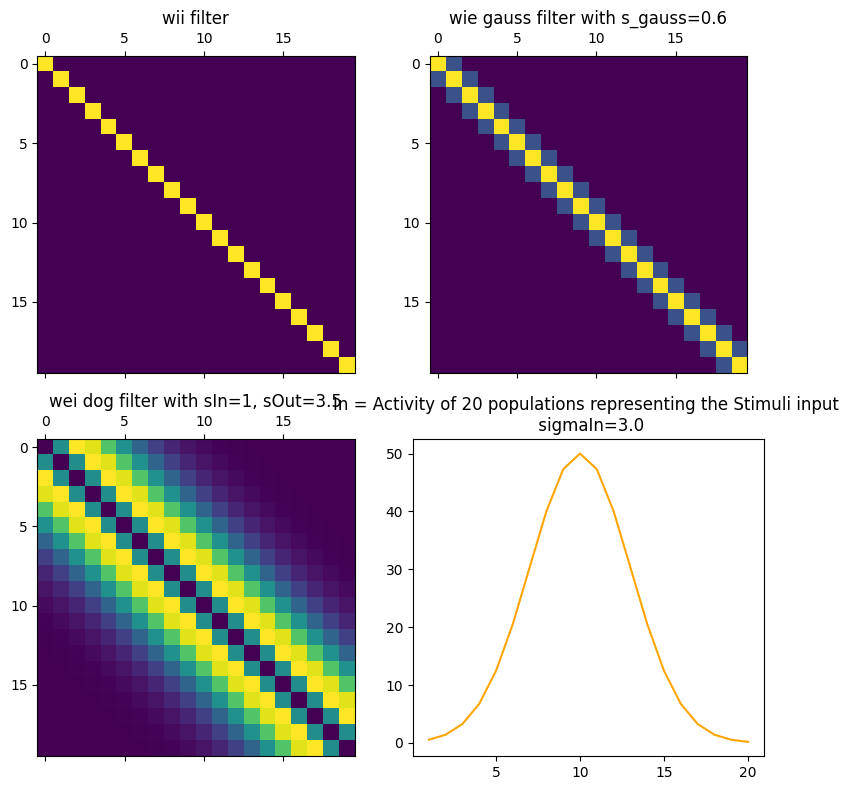

In [17]:
paramDog = Parameter(N = 20, sIn = 1, sOut =3.5, sEI = .2) #sIn = .1, sOut =8.5, sEI = .5) #sIn = .1, sOut =1, sEI = .5) ######sin .01 # sIn = .1, sOut =1.5, sEI = .5
#sIn = .1
#sout how large is the gaussian
print("sIn:", paramDog.sIn, " sOut:", paramDog.sOut, "  sEI:", paramDog.sEI) #4  , .2  , 1.5
x = np.arange(1, paramDog.N +1) #% unitless

fig, ax = plt.subplots(2,2, figsize = (8,8))# (ax1,ax2, ax3, ax4)
#sns.set_style("white")
cmap ='viridis'#'GnBu_r' #"rocket_r" #"viridis"
ax[0,0].matshow(paramDog.wii, cmap=cmap)#plt.cm.Blues)# , cmap=
ax[0,1].matshow(paramDog.wie, cmap=cmap) #wii as identity . matrix Jii = 0
ax[1,0].matshow(paramDog.wei, cmap=cmap)
ax[1,1].plot(x, In[8000], "orange") #matshow(In[1000:1020,:])#

ax[0,0].set_title("wii filter")
ax[0,1].set_title(f"wie gauss filter with s_gauss={paramDog.sEI}" )
ax[1,0].set_title(f"wei dog filter with sIn={paramDog.sIn}, sOut={paramDog.sOut}")
ax[1,1].set_title(f"In = Activity of 20 populations representing the Stimuli input \n sigmaIn={stim.sigmaIn}")

plt.tight_layout()

# Normalise the filters

In [ ]:
def gaussian_filter(s, N): #normalisation not needed when sigma <.4
    k = np.arange(1, N)
    n = 1 / (np.sqrt(2 * np.pi) * N * s)
    gaussW = n * np.exp(-(k - k[:, np.newaxis])**2 / (2 * s**2))
    normG = (gaussW.T / gaussW.sum(axis = 0)).T
    #gaussW = gaussW / np.sum(gaussW)#(0.01**2 / np.max(gaussW))
    return normG


def dog_filter(sIn, sOut, N):
    k = np.arange(1, N)
    gaussIn =  np.exp(-(k - k[:, np.newaxis])**2 / (2 * sIn**2))
    gaussOut = np.exp(-(k - k[:, np.newaxis])**2 / (2 * sOut**2))
    dog = gaussOut - gaussIn
    sumDoG = dog.sum(axis = 1)   #sum over each row
    dog = (dog.T / sumDoG).T  # elementwise division # dog/np.sum(dog)# / (0.88**2 / np.max(dog))
    return dog


In [ ]:
np.eye(20).shape


In [ ]:
N = 20
s = .9
k = np.arange(1, N+1)
n = 1 / (np.sqrt(2 * np.pi) * N * s)
gaussW = n * np.exp(-(k - k[:, np.newaxis])**2 / (2 * s**2))
#sumGaussW = gaussW.sum(axis = 1)
sum(gaussW)
#gaussW = (gaussW.T / sumGaussW).T
normG = (gaussW.T / gaussW.sum(axis = 0)).T# gaussW / gaussW.sum()
#gaussW
plt.plot(k, (gaussW.T / gaussW.sum(axis = 0)).T)
max(normG[0])
#gaussW.sum(axis = 1)

In [ ]:
#k = np.arange(1, 21)
#gaussIn =  np.exp(-(k - k[:, np.newaxis])**2 / (2 * .6**2))
#gaussOut = np.exp(-(k - k[:, np.newaxis])**2 / (2 * 3**2))
#(k -k[:, np.newaxis])**2

In [ ]:
#plt.plot(k, gaussIn[10,:])
#plt.plot(k, gaussOut[10,:])

In [ ]:
max(paramDog.wie[10,:])

In [ ]:
paramDog = Parameter(N = 20, sIn = .041, sOut =1.5, sEI = .0006) #
paramDog2 = Parameter(N = 20, sIn = .06, sOut =1.5, sEI = .01) #
paramDog3 = Parameter(N = 20, sIn = .1, sOut =1.5, sEI = .2) #
paramDog4 = Parameter(N = 20, sIn = .6, sOut =1.5, sEI = .3) #
paramDog5 = Parameter(N = 20, sIn = 1, sOut =1.5, sEI = 30000) #

#cmap = mpl.cm.viridis
#

fig, (ax1, ax2) = plt.subplots(1,2, figsize =(15, 6))

#sns.set_palette("rocket")#, n_colors=4)
sns.set_palette("viridis")#, n_colors=4)
ax1.plot(np.arange(1,20), paramDog.wei[3, :],  label = f"sIn = {paramDog.sIn}")
ax1.plot(np.arange(1,20), paramDog2.wei[10, :], label = f"sIn = {paramDog2.sIn}")
ax1.plot(np.arange(1,20), paramDog3.wei[10, :], label = f"sIn = {paramDog3.sIn}")
ax1.plot(np.arange(1,20), paramDog4.wei[10, :], label = f"sIn = {paramDog4.sIn}")
ax1.plot(np.arange(1,20), paramDog5.wei[10, :], label = f"sIn = {paramDog5.sIn}")
ax1.legend()
ax1.set_title("DOG filter at the positions 1 and 10")

#sns.reset_orig()
#sns.reset_defaults()
ax2.plot(np.arange(1,20), paramDog.wie[1,:],  label = f"sIE = {paramDog.sEI}")
ax2.plot(np.arange(1,20), paramDog2.wie[10, :], label = f"sIE = {paramDog2.sEI}")
ax2.plot(np.arange(1,20), paramDog3.wie[10, :], label = f"sIE = {paramDog3.sEI}")
ax2.plot(np.arange(1,20), paramDog4.wie[10, :], label = f"sIE = {paramDog4.sEI}")
ax2.legend()
ax2.set_title(f"Gaussian filter")



In [ ]:
def dog_filter(sIn, sOut, N):
    k = np.arange(1, N+1)
    gaussIn =  np.exp(-(k - k[:, np.newaxis])**2 / (2 * sIn**2))
    gaussOut = np.exp(-(k - k[:, np.newaxis])**2 / (2 * sOut**2))
    dog = gaussOut - gaussIn
    sumDoG = dog.sum(axis = 1)   #sum over each row
    dog = (dog.T / sumDoG).T  # elementwise division #np.sum(dog)# / (0.88**2 / np.max(dog))
    return dog

In [ ]:
plt.plot(k, dog_filter(.1, 3, 20)[0])
plt.plot(k, dog_filter(.1, 3, 20)[7])

# LoG filter - laplacian decay as sigma increase

In [ ]:
import scipy.ndimage as nd
type(np.zeros((5, 1)))

In [ ]:
#im3 = im.astype(int)


In [ ]:
im = np.vstack((np.ones(1), np.zeros((10, 1))))
im2 = np.concatenate((np.zeros((9, 1)), im))

In [ ]:
s2 = .5

lapl_filter_1 = nd.gaussian_laplace(im2 , 1)
lapl_filter_2 = nd.gaussian_laplace(im2 , s2)
lapl_filter_3 = nd.gaussian_laplace(im2 , 1.1)

In [ ]:
k = np.arange(1,21)

plt.plot(k,lapl_filter_1, label = "1")
plt.plot(k,lapl_filter_2, label = f"{s2}")
plt.plot(k,lapl_filter_3, label = "1.1")
plt.legend(title = "Sigmas")
plt.title("LoG filter at position 10")

Making a 2d laplacian (for each populations)

In [ ]:
#k = np.zeros(20) #N
#k - k[:, np.newaxis]

#x_lap = np.eye(20)

In [ ]:
def LoG_filter(s, N):
  x_lap = np.eye(N)
  lapl_filter = nd.gaussian_laplace(x_lap , sigma= (s, s))
  return lapl_filter
  #im = np.vstack((np.ones(1), np.zeros((N/2, 1))))
  #im2 = np.concatenate((np.zeros((9, 1)), im))

In [ ]:
LoG_filter(1, 20)[1] #"input rank" = 1 value per dimension for sigma

In [ ]:
LoG_1 = LoG_filter(1, 20)
plt.plot(k, LoG_1)

In [ ]:
plt.plot(k, dog_filter(.1, 3, 20))

# Log - gaussian filter

In [ ]:
def gaussian_filter(s, N): #normalisation not needed when sigma <.4
    k = np.arange(1, N)
    n = 1 / (np.sqrt(2 * np.pi) * N * s)
    gaussW = n * np.exp(-(k - k[:, np.newaxis])**2 / (2 * s**2))
    normG = (gaussW.T / gaussW.sum(axis = 0)).T
    #gaussW = gaussW / np.sum(gaussW)#(0.01**2 / np.max(gaussW))
    return normG


In [ ]:
def LoG_filter(s, N):
  x_lap = np.eye(N)
  lapl_filter = nd.gaussian_laplace(x_lap , sigma= (s, s))
  return lapl_filter
  #im = np.vstack((np.ones(1), np.zeros((N/2, 1))))
  #im2 = np.concatenate((np.zeros((9, 1)), im))

In [ ]:
LoG_filter(1, 20)[1] #"input rank" = 1 value per dimension for sigma

In [ ]:
s = .61
x_lap = np.eye(N)
lapl_filter = (nd.gaussian_laplace(x_lap , sigma= (s, s)))
#normlog =  ((lapl_filter.T / lapl_filter.sum(axis = 0)).T)

In [ ]:
lapl_filter.T / lapl_filter.sum(axis = 0)

In [ ]:
s_g = .019 *s#.012 #.0001 * s
k = np.arange(1, N+1)
n = 1 / (np.sqrt(2 * np.pi) *  s_g) #N *
gaussW = -(n * np.exp(-(k - k[:, np.newaxis])**2 / (2 * s_g**2)))
normG = ((gaussW.T / gaussW.sum(axis = 0)).T)

In [ ]:
def gauss(k):
  n = 1 / (np.sqrt(2 * np.pi) * N * s_g)
  return (n * np.exp(-(k)**2 / (2 * s_g**2)))

In [ ]:
N = 20
x1 = 0
x2 = 20

dx =(x2-x1)/N
A = 0

x = x1
while x <= x2:
  dA = gauss(x) * dx
  A = A+ dA
  x = x+dx
print("A =", A)

In [ ]:
plt.plot(k, lapl_filter[6])
plt.plot(k, gaussW[8])

In [ ]:
DIG = lapl_filter - gaussW
plt.plot(k, DIG[9])
plt.plot(k, dog_filter(.1, 1.5, 20)[9])